# Algorithm: Linear Regression 
## Language: Julia

## Author: Daisy Nsibu

## 1. Introduction

 ### What is linear regression?
Linear regression is a supervised learning algorithm that is applied to **real valued** target functions in order to predict a range of possible outputs for a given input.
 
Note: I'd like to point out that this is a predictive or regression algorithm so this is not classification problem. This is giving us a range of possibilites for a given input.

### What are the Assumptions?

+ Assume the targets are close to some linear combination of the features of measurements of the input data. So we need to assume that the labels of our input data lie in some linear combination or close to some linear combination of the input.

+ Unlike other machine learning algorithms linear regression has a closed form solution. In other words, there is an equation that solves linear regression. Now there's also a way to solve this using optimization techniques such as stochastic descent or [gradient descent](https://github.com/Dnsibu/NsibuD_DATA_4319/tree/main/Supervised%20Learning/04-Gradient%20Descent).

Linear Regression is one of the simplest algorithms in machine learning and it can be trained in different ways. However in this notebook I'll be using the closed form of linear regression.

 In general linear regression is used to show relationships with dependencies between feature measures and their label.

### Some possible applications of linear regression Examples:
   + Use Linear Regression to relate the force for extending a spring to the distance the spring stretches to. We can use Linear Regression and model the relationship here and derive [Hooke's law](https://en.wikipedia.org/wiki/Hooke%27s_law).

+ Use Linear Regression to relate the salary of a developer to their age and experience.

### How does it work?

Suppose we have 3 data points on a graph where x is our feature and y is. our label.

$(x^{1}, y^{1})
(x^{2}, y^{2})
(x^{3}, y^{3})$

For example x can be age cn be a feature  and our label y could be salary(USD). Now suppose we want to know the possible salary for $x^{*}$ and we dont know the label but we want a possible salary for someone who is that age.

What we do with linear regression is seek a line that bests fits this data. what we want is a line that somehow approximates those points. So How can we find this line?

### We want
What we want is to solve a system of equations. So for example, we want $y^{1} = w_ix^{1} + w_2$. We also want to hit the other point with the line, $y^{2} = w_ix^{2} + w_2$, and we also want to hit $y^{3} = w_ix^{3} + w_2$ with the line. But there is no line that will fit all those pooints. So in regression the best we can possibly do is approx those points.
$$y^{1} \approxeq w_ix^{1} + w_2$$
$$y^{2} \approxeq w_ix^{2} + w_2$$
$$y^{3} \approxeq w_ix^{3} + w_2$$


But let's ignore the approximation part of this for now.
What does this system look like? Well it looks like this:

$$\begin{bmatrix}
            x^{1}  1\\
            x^{2}  1\\
            x^{3}  1
           \end{bmatrix}\begin{bmatrix}
            w_{1} \\
            w_{2}
           \end{bmatrix} = \begin{bmatrix}
            y^{1} \\
            y^{2} \\
            y^{3}
           \end{bmatrix}$$

To solve this problem, we need to solve this system of equations. So we can denote this matrix as $$\begin{bmatrix}
            x^{1}  1\\
            x^{2}  1\\
            x^{3}  1
           \end{bmatrix} \Rightarrow  X$$ and we can denote this vector as 
$$\begin{bmatrix}
            w_{1} \\
            w_{2}
           \end{bmatrix}\Rightarrow  w$$ and then this vector by $$\begin{bmatrix}
            y^{1} \\
            y^{2} \\
            y^{3}
           \end{bmatrix}\Rightarrow  y$$
 so what we're wishing to solve is $Xw = y$
 
 $X$ is likely non-invertible so the best we can do is solve for an approximation.Say $\hat{w}$ with $X\hat{w}\approx y$. That's the best we can do. So how do we find this?
 
 Well starting from this this equation, we want $Xw = y$ and we know that $X$ is more than likely not invertible. But we can play with this, and multiply both sides by $X^{T}$
  $$X^{T}X\hat{w}=X^{T}y$$ so lets call this solution to this system $\hat{w}$
  
Now $X^{T}X$ is going to be invertible. So what we have now is that, $$X^{T}X\hat{w} = X^{T}y \Rightarrow \hat{w} = (X^{T}X)^{-1}X^{T}y$$ this here is the **closed-form solution** to linear regression. 

*Note: $(X^{T}X)^{-1}$ is called the pseudo inverse of X*

So now thaat we solve this system of equations, we're going to say that if we want to know what the approximate label for this $x^{*}$ is , then we'll say that $y \approx \hat{w_1}x^{*} + \hat{w_2}$ once we solve for $\hat{w}$. This is called a prediction. This prediction for a given input will give us an approximate output provided the data  closely lies to some linear approximation.
  


## 1.2. Loading the data

This is a simple example using regression.

This example shows how useful regression can be . In the following example,  the data are real average salaries for developers and this machine learning algorithm can take in an age and make an accurate prediction as to where the salary should be for a given age. 


In [16]:
# Ages 18 to 55 
# Putting feature variable to X
ages_x = [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 
          36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55] 



# Putting response variable to y
# Developer Salary 
dev_y = [17784, 16500, 18012, 20628, 25206, 30252, 34368, 38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752, 77232, 
         78000, 78508, 79536, 82488, 88935, 90000, 90056, 95000, 90000, 91633, 91660, 98150, 98964, 100000, 98988, 100000, 108923, 105000, 103117]

38-element Array{Int64,1}:
  17784
  16500
  18012
  20628
  25206
  30252
  34368
  38496
  42000
  46752
  49320
  53200
  56000
      ⋮
  95000
  90000
  91633
  91660
  98150
  98964
 100000
  98988
 100000
 108923
 105000
 103117

## 1.3. Required Packages

In [6]:
# Load Packages
using Pkg
using Plots
using Random
using CSV
using DataFrames

# 2. Visulize the Data
Linear regression assumes that the relationship between your input and output is linear. Therefore, we'll test if the data supports this. 

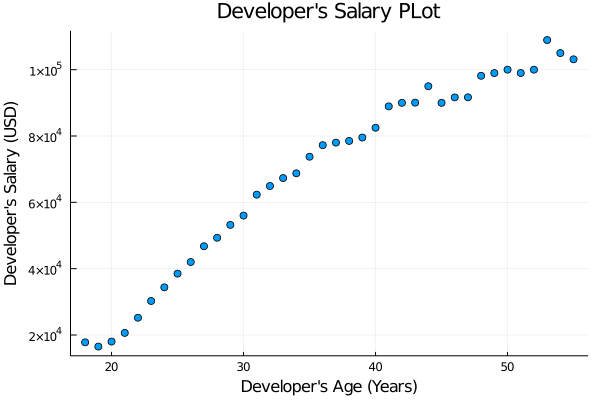

In [17]:
# Visualise the relationship between the feature and the response using scatterplots
data = [x for x in zip(ages_x, dev_y)]

scatter([p for p in data],
xaxis = "Developer's Age (Years)",
yaxis = "Developer's Salary (USD)",
title = "Developer's Salary PLot",
    label = false)


# 3. Splitting into train and test sets
Now we'll  split the data into a training set and a testing set. We will train out the model on the training set and then use the test set to evaluate the model.

In [18]:
# Randomly selecting data points from the data set and splitting data into training and testing set
train_x = randsubseq(ages_x, .7) # a 70/30 train/test split
train_y = [x[2] for x in data if x[1] in train_x] # y training data
train_data = [x for x in zip(train_x, train_y)]

test_data = [x for x in data if x ∉ train_data] # testing data

13-element Array{Tuple{Int64,Int64},1}:
 (20, 18012)
 (22, 25206)
 (26, 42000)
 (29, 53200)
 (31, 62316)
 (34, 68748)
 (37, 78000)
 (38, 78508)
 (39, 79536)
 (40, 82488)
 (41, 88935)
 (43, 90056)
 (44, 95000)

In [21]:
# first make the matrix x. 
x = ones(length(train_x),2)
x[:,1] = train_x
x

25×2 Array{Float64,2}:
 18.0  1.0
 19.0  1.0
 21.0  1.0
 23.0  1.0
 24.0  1.0
 25.0  1.0
 27.0  1.0
 28.0  1.0
 30.0  1.0
 32.0  1.0
 33.0  1.0
 35.0  1.0
 36.0  1.0
 42.0  1.0
 45.0  1.0
 46.0  1.0
 47.0  1.0
 48.0  1.0
 49.0  1.0
 50.0  1.0
 51.0  1.0
 52.0  1.0
 53.0  1.0
 54.0  1.0
 55.0  1.0

In [22]:
# next solve for ŵ 
# NOTE: Ax = b then, x=A\b solves the system

ŵ = (x'*x)\(x'*train_y)

2-element Array{Float64,1}:
   2442.579233026891
 -21343.52866977432

# Define the regression line

In [23]:
# Define the regression line and i.e, the prediction function:

prediction(x) = ŵ[1] * x + ŵ[2];


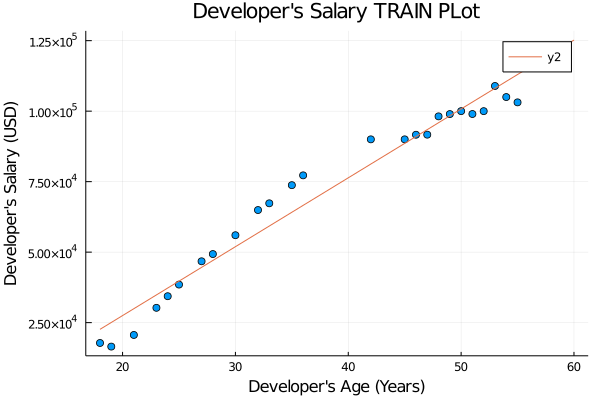

In [24]:
scatter([p for p in train_data],
xaxis = "Developer's Age (Years)",
yaxis = "Developer's Salary (USD)",
title = "Developer's Salary TRAIN PLot",
    label = false)

plot!([(x, prediction(x)) for x = 18:60])

# 4. Test the model

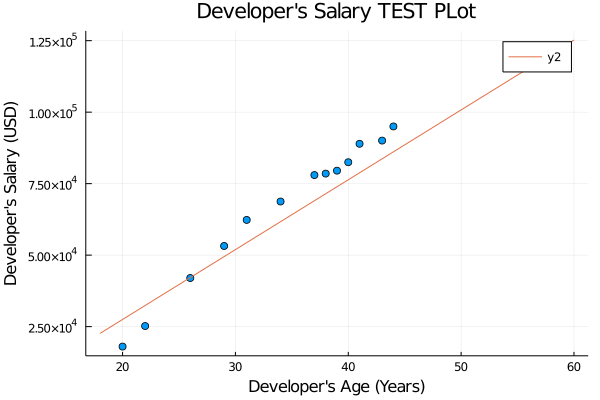

In [25]:
scatter([p for p in test_data],
xaxis = "Developer's Age (Years)",
yaxis = "Developer's Salary (USD)",
title = "Developer's Salary TEST PLot",
    label = false)

plot!([(x, prediction(x)) for x = 18:60])

In [26]:
error_array = [abs(prediction(x[1])- x[2]) for x in train_data]

25-element Array{Float64,1}:
  4838.897524709719
  8565.476757736607
  9322.635223790392
  4583.793689844169
  2910.3729228710654
  1224.952155897954
  2145.8893780482686
  2271.31014502138
  4066.151678967588
  8108.993212913811
  8055.413979886922
  9605.255513833145
 10642.676280806249
  8755.200882644887
  1427.4631835642213
   617.8839505373326
  1797.6952824895561
  2249.725484483555
   621.1462514566665
   785.4329815702222
  4240.012214597111
  5670.591447624
   809.8293193491118
  5555.749913677777
  9881.329146704666

In [27]:
maximum(error_array)

10642.676280806249

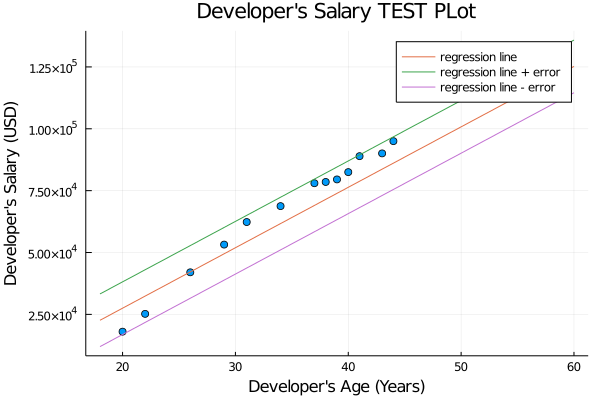

In [33]:
scatter([p for p in test_data],
xaxis = "Developer's Age (Years)",
yaxis = "Developer's Salary (USD)",
title = "Developer's Salary TEST PLot",
    label = false)

plot!([(x, prediction(x)) for x = 18:60], label = "regression line")

plot!([(x, prediction(x)+ maximum(error_array)) for x = 18:60], label = "regression line + error")

plot!([(x, prediction(x)- maximum(error_array)) for x = 18:60], label = "regression line - error")

In [29]:
prediction_interval(x) = (prediction(x) - maximum(error_array), x + maximum(error_array) )

prediction_interval (generic function with 1 method)

In [30]:
test_data


13-element Array{Tuple{Int64,Int64},1}:
 (20, 18012)
 (22, 25206)
 (26, 42000)
 (29, 53200)
 (31, 62316)
 (34, 68748)
 (37, 78000)
 (38, 78508)
 (39, 79536)
 (40, 82488)
 (41, 88935)
 (43, 90056)
 (44, 95000)

In [31]:
prediction_interval(48)

(85257.5982347102, 10690.676280806249)

# 5. Conclusion

So this is a really good example of how useful regression can be. For a developer to be 48 years old the linear model predicts that his or her salary would fall between $85,257$ and $10,690$ dollars (USD)
